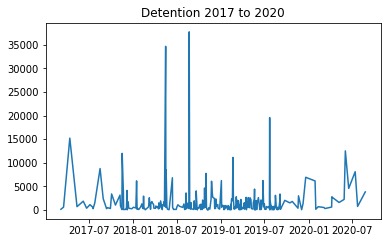

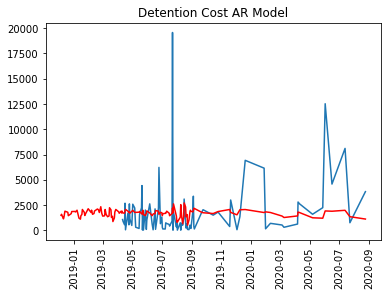

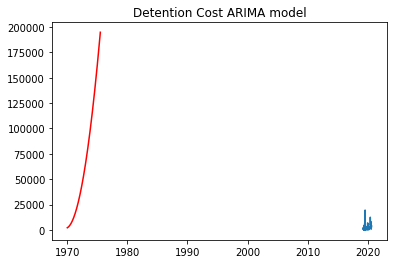

(0, 0, 0) 5553.119952107617
(0, 0, 1) 5555.105039182109
(0, 0, 2) 5556.810499618966
(0, 0, 3) 5558.622359436534
(0, 1, 0) 5735.652696325091
(0, 1, 1) 5542.475597825337
(0, 1, 2) 5544.47098708499
(0, 1, 3) 5546.110547649395
(0, 2, 0) 6034.327592621905
(0, 2, 1) 5724.339371619409
(0, 2, 2) 5538.927918731644
(0, 2, 3) 5540.776567305326
(1, 0, 0) 5555.104147817896
(1, 0, 1) 5556.956544113409
(1, 0, 2) 5558.7377195531435
(1, 0, 3) 5557.5617471373425
(1, 1, 0) 5647.856136376265
(1, 1, 1) 5544.470645109841
(1, 1, 2) 5545.409745607608
(1, 1, 3) 5547.448901636267
(1, 2, 0) 5851.751258755839
(2, 0, 0) 5556.823220554703
(2, 0, 1) 5557.717079242838
(2, 1, 0) 5621.470588439876
(2, 1, 1) 5546.128019359123
(2, 1, 2) 5548.0666986483475
(2, 1, 3) 5547.984669961868
(2, 2, 0) 5775.982968063379
(3, 0, 0) 5558.622768382193
(3, 0, 1) 5557.590292179722
(3, 0, 2) 5559.569820397049
(3, 0, 3) 5555.114374177615
(3, 1, 0) 5608.045854785458
(3, 1, 1) 5547.976669170861
(3, 1, 2) 5548.583984606369
(3, 1, 3) 5550.584

In [29]:
import pandas as pd
import numpy as np
from pandas import read_csv
from matplotlib import pyplot as plt
from datetime import datetime

## Import 2017 Loads Data
CSV = pd.read_csv("Weekly loads 2017.csv",index_col=0,parse_dates=['Week','Date'])
Yr2017 = pd.DataFrame(CSV)
Yr2017 = Yr2017.dropna(subset=['Weight'])
Yr2017 = Yr2017.sort_values(by='Date')
Yr2017['Weight'] = Yr2017['Weight'].replace("'",'',regex=True)
Yr2017['Weight'] = Yr2017['Weight'].apply(pd.to_numeric,errors='coerce')
Cancelled = Yr2017[Yr2017['Weight'] == 1].index
Yr2017 = Yr2017.drop(Cancelled)

## Import 2018 Loads Data
CSV = pd.read_csv("Weekly loads 2018.csv",index_col=0,parse_dates=['Week','Date'])
Yr2018 = pd.DataFrame(CSV)
Yr2018 = Yr2018.dropna(subset=['Weight'])
Yr2018 = Yr2018.sort_values(by='Date')
Yr2018['Weight'] = Yr2018['Weight'].replace("'",'',regex=True)
Yr2018['Weight'] = Yr2018['Weight'].apply(pd.to_numeric,errors='coerce')
Cancelled = Yr2018[Yr2018['Weight'] == 1].index
Yr2018 = Yr2018.drop(Cancelled)

## Import 2019 Loads Data
CSV = pd.read_csv("Weekly loads 2019.csv",index_col=0,parse_dates=['Week','Date'])
Yr2019 = pd.DataFrame(CSV)
Yr2019 = Yr2019.dropna(subset=['Weight'])
Yr2019 = Yr2019.sort_values(by='Date')
Yr2019['Weight'] = Yr2019['Weight'].replace("'",'',regex=True)
Yr2019['Weight'] = Yr2019['Weight'].apply(pd.to_numeric,errors='coerce')
Cancelled = Yr2019[Yr2019['Weight'] == 1].index
Yr2019 = Yr2019.drop(Cancelled)

## Import 2020 Loads Data
CSV = pd.read_csv("Weekly loads 2020.csv",index_col=0,parse_dates=['Week','Date'])
Yr2020 = pd.DataFrame(CSV)
Yr2020 = Yr2020.dropna(subset=['Weight'])
Yr2020 = Yr2020.sort_values(by='Date')
Yr2020['Weight'] = Yr2020['Weight'].replace("'",'',regex=True)
Yr2020['Weight'] = Yr2020['Weight'].apply(pd.to_numeric,errors='coerce')
Cancelled = Yr2020[Yr2020['Weight'] == 1].index
Yr2020 = Yr2020.drop(Cancelled)

## Combine Dataframes into a single Series
Loads = pd.concat([Yr2017,Yr2018,Yr2019,Yr2020])
Loads = Loads.groupby(['Week'])['Weight'].count()
Loads.plot(grid=True)
plt.title("Weekly Volume")
plt.show()

## Import Statsmodel for building AR model
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

## Testing variables
X = Loads.values
train = X[0:15] # 6 months as train data
test = X[15:30] # 6 months as test data
predict_AR = []
predict_ARIMA = []

## Autoregressive Model 
model_ar = AR(train)
model_ar_fit = model_ar.fit()

predict_AR = model_ar_fit.predict(start=15, end=30)
plt.plot(test)
plt.plot(predict_AR, color='red')
plt.title("AR Model 2017")
plt.show()

## Import ARIMA Model
from statsmodels.tsa.arima_model import ARIMA

## P, D, Q
# P (Periods for AR), D (Integrated order, # of times differencing), Q (Moving Average)

## 2017 ARIMA Model
model_arima = ARIMA(train,order=(0,2,2))
model_arima_fit = model_arima.fit()
predict_ARIMA = model_arima_fit.forecast(steps=15)[0]

plt.plot(test)
plt.plot(predict_ARIMA, color='red')
plt.title("ARIMA Model 2017")
plt.show()

## Figuring out the parameters
import itertools
p = d = q = range(0,4)
pdq = list(itertools.product(p,d,q))

import warnings
warnings.filterwarnings('ignore')

## Finding 2017 PDQ:
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        #print(param,model_arima_fit.aic)
    except:
        continue

mean_squared_error(test,predict_ARIMA)

## Set up 2018 year models
train_18 = X[0:30] # 2017 as train data
test_18 = X[30:60] # 2018 as test data
predict_AR_18 = []
predict_ARIMA_18 = []

## 2018 Autoregressive Model 
model_ar_18 = AR(train_18)
model_ar_fit_18 = model_ar_18.fit()

predict_AR_18 = model_ar_fit_18.predict(start=30, end=60)
plt.plot(test_18)
plt.plot(predict_AR_18, color='red')
plt.title("AR Model 2018")
plt.show()

## 2018 ARIMA Model
model_arima_18 = ARIMA(train_18,order=(2,1,1))
model_arima_fit_18 = model_arima_18.fit()
predict_ARIMA_18 = model_arima_fit_18.forecast(steps=30)[0]

plt.plot(test_18)
plt.plot(predict_ARIMA_18, color='red')
plt.title("ARIMA Model 2018")
plt.show()

## Finding 2018 PDQ:
for param in pdq:
    try:
        model_arima_18 = ARIMA(train_18,order=param)
        model_arima_fit_18 = model_arima_18.fit()
        #print(param,model_arima_fit_18.aic)
    except:
        continue

## Set up 4-year models
train_4yr = X[0:64] # 2017 & 2018 as train data
test_4yr = X[64:] # 2019 & 2020 as test data
predict_AR_4yr = []
predict_ARIMA_4yr = []

## 4-year Autoregressive Model 
model_ar_4yr = AR(train_4yr)
model_ar_fit_4yr = model_ar_4yr.fit()

predict_AR_4yr = model_ar_fit_4yr.predict(start=64, end=137)
plt.plot(test_4yr)
plt.plot(predict_AR_4yr, color='red')
plt.title("4-year AR Model")
plt.show()

## 4-year ARIMA Model
model_arima_4yr = ARIMA(train_4yr,order=(0,1,2))
model_arima_fit_4yr = model_arima_4yr.fit()
predict_ARIMA_4yr = model_arima_fit_4yr.forecast(steps=73)[0]

plt.plot(test_4yr)
plt.plot(predict_ARIMA_4yr, color='red')
plt.title("4-year ARIMA model")
plt.show()

## Finding 4-year PDQ:
for param in pdq:
    try:
        model_arima_4yr = ARIMA(train_4yr,order=param)
        model_arima_fit_4yr = model_arima_4yr.fit()
        #print(param,model_arima_fit_4yr.aic)
    except:
        continue

## 2021 Predictions - AR Model
train_2021 = X[0:137] # 2017, 2018, 2019, 2021 as train data
test_2021 = X[100:167] # 2021 as test data
predict_AR_2021 = []
predict_ARIMA_2021 = []

## 2021 Autoregressive Model 
model_ar_2021 = AR(train_2021)
model_ar_fit_2021 = model_ar_2021.fit()

predict_AR_2021 = model_ar_fit_2021.predict(start=100, end=167)
plt.plot(test_2021)
plt.plot(predict_AR_2021, color='red')
plt.title("2021 AR Prediction")
plt.show()

## 2021 Predictions ARIMA Model
model_arima_2021 = ARIMA(train_2021,order=(0,1,2))
model_arima_fit_2021 = model_arima_2021.fit()
predict_ARIMA_2021 = model_arima_fit_2021.forecast(steps=67)[0]

plt.plot(test_2021)
plt.plot(predict_ARIMA_2021, color='red')
plt.title("2021 ARIMA model")
plt.show()

## Finding 4-year PDQ:
for param in pdq:
    try:
        model_arima_2021 = ARIMA(train_2021,order=param)
        model_arima_fit_2021 = model_arima_2021.fit()
        #print(param,model_arima_fit_2021.aic)
    except:
        continue

## Import Detention Costs
CSV = pd.read_csv("Detention 2017 to 2020.csv",index_col=['Payment Posting Date'],parse_dates=['Payment Posting Date'])
Detention = pd.DataFrame(CSV)
Detention = Detention.sort_values(by='Payment Posting Date')
Detention = Detention['Actual Amount(in TR curr)']
Detention = Detention.groupby(['Payment Posting Date']).sum()
plt.clf()
plt.plot(Detention)
plt.title("Detention 2017 to 2020")
plt.show()

## Set up Detention Cost testing variables
train_dete = Detention[0:288] # 2017-2020 data as train data
test_dete = Detention[200:288] # ~1 year test data
predict_AR_dete = []
predict_ARIMA_dete = []

## Detention Autoregressive Model 
model_ar_dete = AR(train_dete)
model_ar_fit_dete = model_ar_dete.fit()
predict_AR_dete = model_ar_fit_dete.predict(start=datetime(2018,12,5), end=datetime(2020,8,24))
plt.clf()
plt.plot(test_dete)
plt.plot(predict_AR_dete, color='red')
plt.title("Detention Cost AR Model")
plt.xticks(rotation='vertical')
plt.show()